In [2]:
# Week 3:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):    
      return 1/(1 + np.exp(-x))

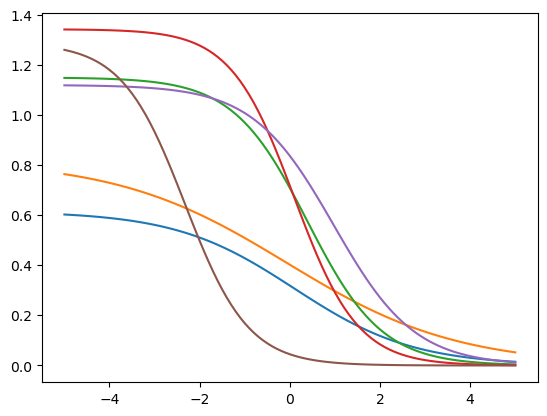

In [17]:
n_nodes = 1   # EDIT THIS

for plot_num in range(6):  # repeat a number of times and show different output curves in the plot    
# Initial setup - it is not important to understand this block of code in detail    
# Random initialisation of weights and bias terms (different for each run)    
    bias = np.sort(np.random.rand(n_nodes)*8-4)   # choose spaced out bias values (these control sigmoid centres)    
    w = np.abs(np.random.rand(n_nodes,2))+0.5   # randomly assign weight values in [0.5,1.5]    
    w[::2,0] *= -1   # alternate signs of weights in first level (to highlight functions that go up and down)    
    # Set up input values (span the range to let us plot the output) and storage for output values    
    x = np.linspace(-5, 5, num=101)    
    y = x*0  # output storage (empty array of same size as x)   
    # bias *= 0                        # EDIT THIS (uncomment to set bias to zero)    
    # Neural network calculation - try to understand the following code   
    for n in range(len(x)):   # run network for each input value separately       
        layer1_in = w[:,0] * x[n] + bias    # input is x[n] to each node      
        layer1_out = sigmoid(layer1_in)     # applies sigmoid for each node separately (EDIT THIS for step 4)  
        y[n] = np.sum(w[:,1] * layer1_out)  # output is simple sum (no output activation function)   
    plt.plot(x,y)

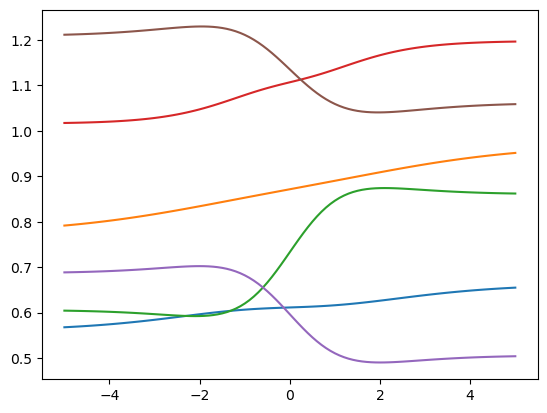

In [18]:
n_nodes = 2   # EDIT THIS

for plot_num in range(6):  # repeat a number of times and show different output curves in the plot    
# Initial setup - it is not important to understand this block of code in detail    
# Random initialisation of weights and bias terms (different for each run)    
    bias = np.sort(np.random.rand(n_nodes)*8-4)   # choose spaced out bias values (these control sigmoid centres)    
    w = np.abs(np.random.rand(n_nodes,2))+0.5   # randomly assign weight values in [0.5,1.5]    
    w[::2,0] *= -1   # alternate signs of weights in first level (to highlight functions that go up and down)    
    # Set up input values (span the range to let us plot the output) and storage for output values    
    x = np.linspace(-5, 5, num=101)    
    y = x*0  # output storage (empty array of same size as x)   
    bias *= 0                        # EDIT THIS (uncomment to set bias to zero)    
    # Neural network calculation - try to understand the following code   
    for n in range(len(x)):   # run network for each input value separately       
        layer1_in = w[:,0] * x[n] + bias    # input is x[n] to each node      
        layer1_out = sigmoid(layer1_in)     # applies sigmoid for each node separately (EDIT THIS for step 4)  
        y[n] = np.sum(w[:,1] * layer1_out)  # output is simple sum (no output activation function)   
    plt.plot(x,y)

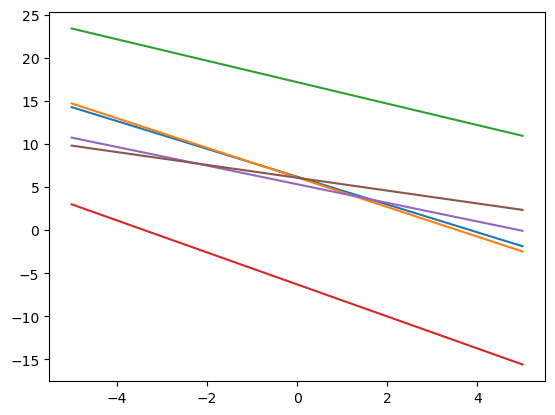

In [19]:
n_nodes = 5   # EDIT THIS

for plot_num in range(6):  # repeat a number of times and show different output curves in the plot    
# Initial setup - it is not important to understand this block of code in detail    
# Random initialisation of weights and bias terms (different for each run)    
    bias = np.sort(np.random.rand(n_nodes)*8-4)   # choose spaced out bias values (these control sigmoid centres)    
    w = np.abs(np.random.rand(n_nodes,2))+0.5   # randomly assign weight values in [0.5,1.5]    
    w[::2,0] *= -1   # alternate signs of weights in first level (to highlight functions that go up and down)    
    # Set up input values (span the range to let us plot the output) and storage for output values    
    x = np.linspace(-5, 5, num=101)    
    y = x*0  # output storage (empty array of same size as x)   
    # bias *= 0                        # EDIT THIS (uncomment to set bias to zero)    
    # Neural network calculation - try to understand the following code   
    for n in range(len(x)):   # run network for each input value separately       
        layer1_in = w[:,0] * x[n] + bias    # input is x[n] to each node      
        layer1_out = layer1_in#sigmoid(layer1_in)     # applies sigmoid for each node separately (EDIT THIS for step 4)  
        y[n] = np.sum(w[:,1] * layer1_out)  # output is simple sum (no output activation function)   
    plt.plot(x,y)

In [3]:
# Keras and TensorFlow code imports
import tensorflow as tf
from tensorflow import keras 

In [24]:
# Keras code for layers corresponding to the diagram above
# Use the sequential style (the simplest style)
model = keras.models.Sequential()
# Each layer is fully connected to the previous layer (when using Dense type of layers)
model.add(keras.Input(shape=(4,)))  # Input layer (representing input values)
model.add(keras.layers.Dense(5))    # 1st hidden layer
model.add(keras.layers.Dense(5))    # 2nd hidden layer
model.add(keras.layers.Dense(1))    # Output layer

In [25]:
# Display a summary of the model's architecture (including number of parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


parameter attributed to:
4M (inout to 1st layer weight)
M (first layer bias)
5M (1st to 2nd layer weight)
5 (second layer bias)
5 (second layer to output weights)
1 (output layer bias)
 = 10M+11
 
for M=5 as above, parameters = 61

In [26]:
# Illustrate some different activation functions
x = np.linspace(-5,5,101)  # our x-axis values for calculations/plots

# Definitions of the activation functions
y_sig = sigmoid(x)   # defined in code above
y_relu = x*(x>=0) + 0*(x<0)
y_leaky_relu = x*(x>=0) + 0.01*x*(x<0)
a = 0.2  # the adjustable parameter (this is just an example - try other values!)
y_para_relu = x*(x>=0) + a*x*(x<0)
y_elu = x*(x>=0) + a*(np.exp(x)-1)*(x<0)

Text(0.5, 1.0, 'ELU')

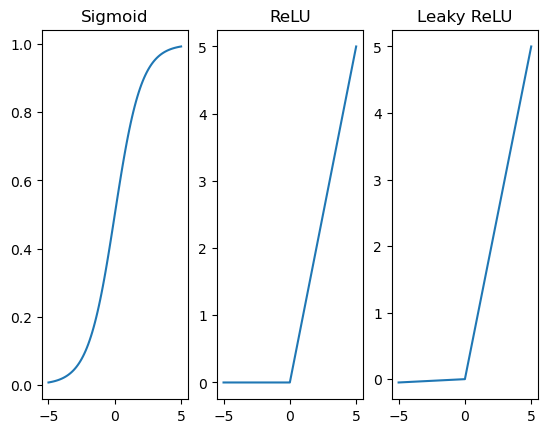

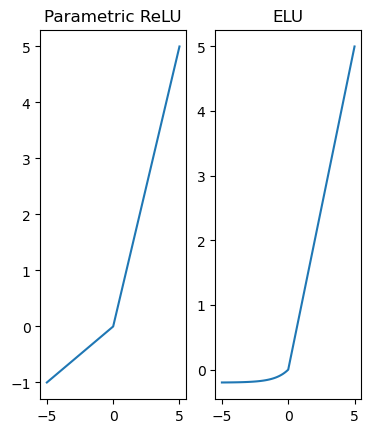

In [29]:
# Display these
plt.subplot(1,3,1)
plt.plot(x,y_sig)
plt.title('Sigmoid')
plt.subplot(1,3,2)
plt.plot(x,y_relu)
plt.title('ReLU')
plt.subplot(1,3,3)
plt.plot(x,y_leaky_relu)
plt.title('Leaky ReLU')
plt.figure()
plt.subplot(1,3,2)
plt.plot(x,y_para_relu)
plt.title('Parametric ReLU')
plt.subplot(1,3,3)
plt.plot(x,y_elu)
plt.title('ELU')

In [30]:
# This is how you specify a simple activation function in a Keras layer
model.add(keras.layers.Dense(5, activation = "relu"))

In [33]:
# To couple the model that we've built to the loss function we call 'compile' just like this:
model.compile(loss='sparse_categorical_crossentropy', ...)  # other arguments are also needed - see next section

#Other options:
#'mean_absolute_error'
#'mean_squared_error'
#'categorical_crossentropy'
#'binary_crossentropy'.

SyntaxError: positional argument follows keyword argument (2625505199.py, line 2)

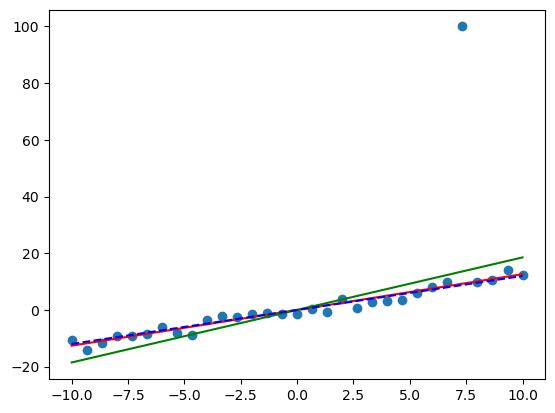

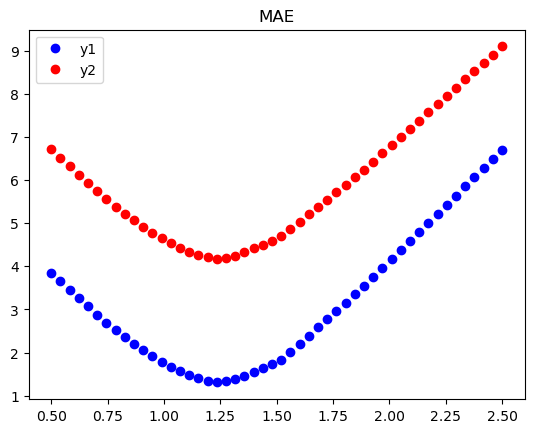

In [38]:
# Make some simple data suitable for a linear fit (but with zero intercept) with additional noise
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = np.linspace(-10,10,31).reshape(-1,1)
slope_true = 1.2   # ground truth
y0 = slope_true*x  
y1 = y0 + 2*np.random.randn(x.shape[0],1)  
y2 = y1 + 0    # force a copy of y1
y2[-5] = 100   # add an extreme value

# show data points in the case with one extreme valueplt.
plt.plot(x,y2,'o')
# fit lines with MSE (default for linear regression) - force it to have zero intercept
reg1 = LinearRegression(fit_intercept=False).fit(x, y1)
reg2 = LinearRegression(fit_intercept=False).fit(x, y2)
# show fitted linesplt.
plt.plot(x,reg1.coef_[0]*x,'r-')
plt.plot(x,reg2.coef_[0]*x,'g-')
plt.plot(x,y0,'b--')  # dotted black is ground truth
plt.show()
# Plot the loss function versus parameter value (slope)
# The minimum of the loss function is _defined_ as the 'best' slope

# Do it for MAE first
for slope in list(np.linspace(0.5,2.5,50)):    
     plt.plot(slope,metrics.mean_absolute_error(slope*x,y1),'bo')    
     plt.plot(slope,metrics.mean_absolute_error(slope*x,y2),'ro')
plt.legend(['y1','y2'])
plt.title('MAE')
plt.show()
# Do the same for Mean Squared Error (MSE)
# ADD YOUR OWN CODE HERE


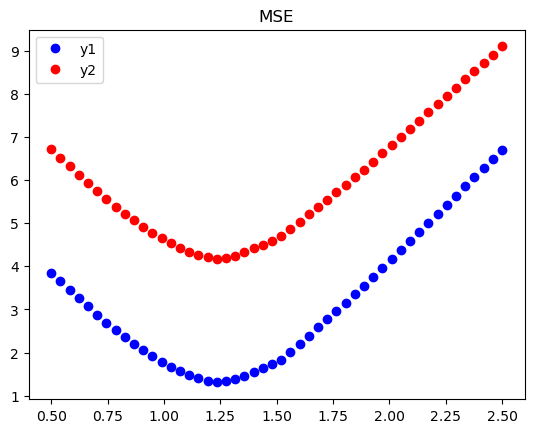

In [39]:

# Do it for MAE first
for slope in list(np.linspace(0.5,2.5,50)):    
     plt.plot(slope,metrics.mean_absolute_error(slope*x,y1),'bo')    
     plt.plot(slope,metrics.mean_absolute_error(slope*x,y2),'ro')
plt.legend(['y1','y2'])
plt.title('MSE')
plt.show()

In [43]:
# How to specify an optimiser with the default learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
# Now the same but with a specified learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [44]:
# How to fit the model to data, specifying the training and validation data

# DO NOT RUN THIS NOW - AS WE HAVE NOT LOADED ANY DATA YET!
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_valid, y_valid))

NameError: name 'X_train' is not defined

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()
print(iris.data.shape)
print(iris.target.shape)
X_train_full = iris.data
y_train_full = iris.target

(150, 4)
(150,)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
# Use the sequential style (the simplest style)
model = keras.models.Sequential()
# Each layer is fully connected to the previous layer (when using Dense option)
model.add(keras.Input(shape=(4,)))  # Input layer (representing input values)
model.add(keras.layers.Dense(5, activation='relu'))    # 1st hidden layer
model.add(keras.layers.Dense(5, activation='relu'))    # 2nd hidden layer
model.add(keras.layers.Dense(3, activation='softmax'))    # Output layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 25        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 3)                 18        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
y_train_full, test_size = 0.1, stratify = y_train_full)

In [57]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_valid, y_valid))

Epoch 1/50
14/14 [==============================] - 1s 16ms/step - loss: 1.2982 - accuracy: 0.3333 - val_loss: 1.1937 - val_accuracy: 0.3333
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 1.1894 - accuracy: 0.3407 - val_loss: 1.1548 - val_accuracy: 0.4000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 1.1544 - accuracy: 0.5481 - val_loss: 1.1313 - val_accuracy: 0.6000
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 1.1325 - accuracy: 0.6667 - val_loss: 1.1128 - val_accuracy: 0.6667
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 1.1148 - accuracy: 0.6667 - val_loss: 1.0970 - val_accuracy: 0.6667
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.6296 - val_loss: 1.0833 - val_accuracy: 0.6667
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 1.0863 - accuracy: 0.6519 - val_loss: 1.0693 - val_accuracy: 0.5333
Epoch 8/50
14/14 [=

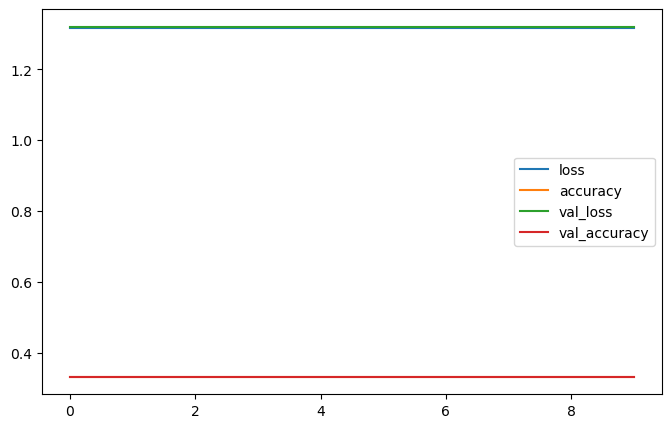

In [106]:
# Example Keras code for how learning curves can be stored
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

In [107]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
print(X_train_full.shape)

(60000, 28, 28)


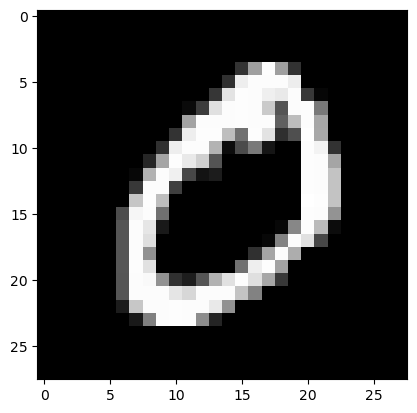

In [108]:
plt.imshow(X_train_full[1,:,:], cmap='gray')
plt.grid(False)
plt.show()

In [112]:
print(y_train_full[1])
print((np.min(X_train_full),np.max(X_train_full)))
XSIZE, YSIZE = X_train_full.shape[1:3]

0
(0, 255)


In [113]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, stratify = y_train_full)

In [114]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [XSIZE , YSIZE]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [115]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [117]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1000,
validation_data=(X_valid, y_valid))

Epoch 1/10
48/48 [==============================] - 2s 24ms/step - loss: 52.8712 - accuracy: 0.5696 - val_loss: 1.2678 - val_accuracy: 0.7496
Epoch 2/10
48/48 [==============================] - 1s 17ms/step - loss: 0.8597 - accuracy: 0.8004 - val_loss: 0.7414 - val_accuracy: 0.8372
Epoch 3/10
48/48 [==============================] - 1s 18ms/step - loss: 0.5896 - accuracy: 0.8508 - val_loss: 0.6123 - val_accuracy: 0.8611
Epoch 4/10
48/48 [==============================] - 1s 17ms/step - loss: 0.4600 - accuracy: 0.8769 - val_loss: 0.4949 - val_accuracy: 0.8833
Epoch 5/10
48/48 [==============================] - 1s 18ms/step - loss: 0.3751 - accuracy: 0.9000 - val_loss: 0.4402 - val_accuracy: 0.8982
Epoch 6/10
48/48 [==============================] - 1s 17ms/step - loss: 0.3432 - accuracy: 0.9074 - val_loss: 0.4213 - val_accuracy: 0.9020
Epoch 7/10
48/48 [==============================] - 1s 17ms/step - loss: 0.3175 - accuracy: 0.9143 - val_loss: 0.3617 - val_accuracy: 0.9170
Epoch 8/10
4

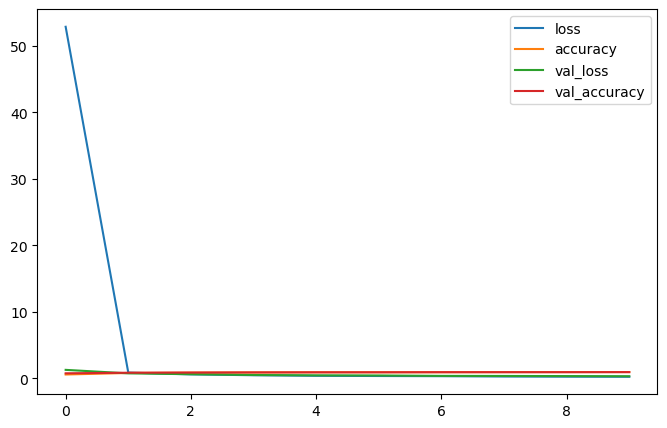

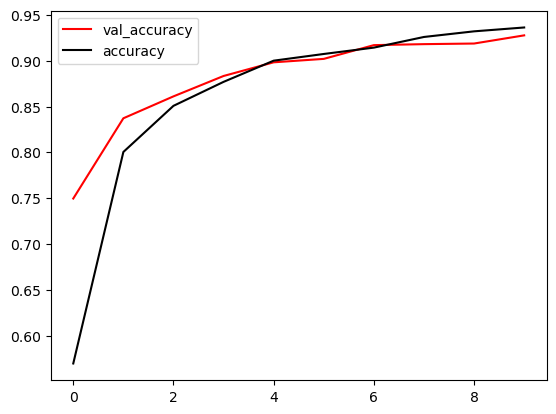

In [118]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()
plt.plot(history.history['val_accuracy'],'r')
plt.plot(history.history['accuracy'],'k')
plt.legend(['val_accuracy','accuracy'])
plt.show()

In [119]:
# Store the models and results
models =[model]
results =[history.history['val_accuracy'][-1]]  # pick out final validation accuracy score

for lrate in [0.1, 0.0001]:  # this could be altered to change any of the settings in the following models
     model =keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape =[XSIZE , YSIZE])
)
     model.add(keras.layers.Dense(300, activation ="relu"))
     model.add(keras.layers.Dense(100, activation ="relu"))
     model.add(keras.layers.Dense(10, activation ="softmax"))
     model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=lrate), metrics=["accuracy"])
     history =model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_valid, y_valid))
     results.append(history.history['val_accuracy'][-1])
     models.append(model)

Epoch 1/10
48/48 [==============================] - 2s 24ms/step - loss: 13.4996 - accuracy: 0.7382 - val_loss: 2.4460 - val_accuracy: 0.8807
Epoch 2/10
48/48 [==============================] - 1s 18ms/step - loss: 1.4736 - accuracy: 0.8972 - val_loss: 1.5175 - val_accuracy: 0.8946
Epoch 3/10
48/48 [==============================] - 1s 18ms/step - loss: 0.8339 - accuracy: 0.9196 - val_loss: 1.1451 - val_accuracy: 0.9102
Epoch 4/10
48/48 [==============================] - 1s 18ms/step - loss: 0.5459 - accuracy: 0.9375 - val_loss: 0.9764 - val_accuracy: 0.9189
Epoch 5/10
48/48 [==============================] - 1s 18ms/step - loss: 0.3831 - accuracy: 0.9497 - val_loss: 0.8923 - val_accuracy: 0.9193
Epoch 6/10
48/48 [==============================] - 1s 18ms/step - loss: 0.2842 - accuracy: 0.9570 - val_loss: 0.8110 - val_accuracy: 0.9233
Epoch 7/10
48/48 [==============================] - 1s 18ms/step - loss: 0.2133 - accuracy: 0.9653 - val_loss: 0.7807 - val_accuracy: 0.9277
Epoch 8/10
4

Epoch 1/10
48/48 [==============================] - 2s 22ms/step - loss: 16.7325 - accuracy: 0.6953 - val_loss: 2.0186 - val_accuracy: 0.8242
Epoch 2/10
48/48 [==============================] - 1s 18ms/step - loss: 1.2779 - accuracy: 0.8436 - val_loss: 1.1241 - val_accuracy: 0.8423
Epoch 3/10
48/48 [==============================] - 1s 17ms/step - loss: 0.7758 - accuracy: 0.8631 - val_loss: 0.8740 - val_accuracy: 0.8613
Epoch 4/10
48/48 [==============================] - 1s 18ms/step - loss: 0.5541 - accuracy: 0.8866 - val_loss: 0.7503 - val_accuracy: 0.8802
Epoch 5/10
48/48 [==============================] - 1s 18ms/step - loss: 0.4291 - accuracy: 0.9061 - val_loss: 0.6749 - val_accuracy: 0.8887
Epoch 6/10
48/48 [==============================] - 1s 18ms/step - loss: 0.3406 - accuracy: 0.9218 - val_loss: 0.6214 - val_accuracy: 0.8954
Epoch 7/10
48/48 [==============================] - 1s 18ms/step - loss: 0.2812 - accuracy: 0.9334 - val_loss: 0.5877 - val_accuracy: 0.9059
Epoch 8/10
4

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Determine the best model (from validation results)
print(results)
best_model = np.argmax(results)
print(best_model)

# Restore best model
model = models[best_model]

[0.9276666641235352, 0.9329166412353516, 0.9135833382606506]
1


In [123]:
# Calculate summary results on test data
testres = model.evaluate(X_test, y_test, verbose=0)  # for a set of test data
print(testres)

# Calculate results for each sample in testset
y_pred = model.predict(X_test)  # for one or more samples of test data

[0.5901233553886414, 0.9354000091552734]
313/313 [==============================] - 1s 4ms/step


In [124]:
# Calculate and print confusion matrix
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

# Plot confusion matrix
df_cm = pd.DataFrame(confmat, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # size is font size

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## week 4

In [127]:
# Add appropriate imports here
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', dpi = 120) # set good resolution

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [128]:
# Load MNIST data
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
print(X_train_full.shape)
XSIZE, YSIZE = X_train_full.shape[1:3]

(60000, 28, 28)


In [129]:
# Use the train_test_split function to split the data into training and validation, given that a
# separate hold-out testset has already been provided. We will use an 80/20 split for training/validation.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size = 0.2, stratify = y_train_full)

In [130]:
# Create a Keras sequential model with the following setup (use code examples from main module)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [XSIZE , YSIZE]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# Print a summary of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               235500    
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the model
model.compile(loss= 'sparse_categorical_crossentropy',
               optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [134]:
# Run fit
history = model.fit(X_train, y_train, epochs = 10, batch_size = 1000,
                   validation_data=(X_valid, y_valid),verbose = 0)

In [135]:
def build_dense_net():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [XSIZE , YSIZE]))
    model.add(keras.layers.Dense(300, activation = "relu"))
    model.add(keras.layers.Dense(100, activation = "relu"))
    model.add(keras.layers.Dense(10, activation = "softmax"))

    return model

In [136]:
# Initialise empty list of models
models = []
results = []

# Set the list of optimisers
optimisers= [keras.optimizers.RMSprop(),
                  keras.optimizers.Adam(),
                  keras.optimizers.Nadam(),
                  keras.optimizers.Adamax()]

# Train with each optimiser
for i_opt in range(len(optimisers)):
    print('Starting optimiser ' + str(i_opt))
    model=build_dense_net()
    model.compile(loss= 'sparse_categorical_crossentropy',
                           optimizer=optimisers[i_opt], metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=30, batch_size=1000,
                           validation_data=(X_valid, y_valid),verbose=0)
    results.append(history.history)
    models.append(model)
else:
  print('Finished.')

Starting optimiser 0
Starting optimiser 1
Starting optimiser 2
Starting optimiser 3
Finished.


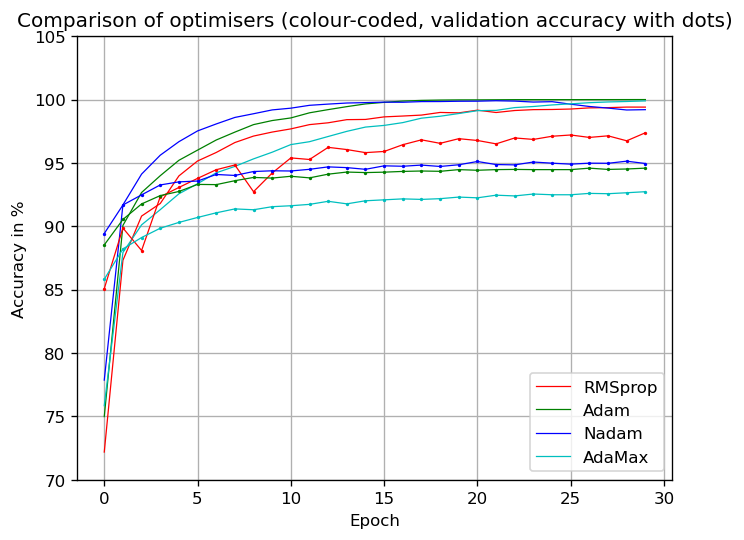

In [137]:
# Display the history of each optimiser
colormap=['r', 'g', 'b', 'c', 'm', 'y']

for i_opt in range(len(optimisers)):
    acc=np.array(results[i_opt]['accuracy'])
    plt.plot(100*acc,     linewidth=0.75, color=colormap[i_opt])

for i_opt in range(len(optimisers)):
    val_acc=np.array(results[i_opt]['val_accuracy'])
    plt.plot(100*val_acc, linewidth=0.75, color=colormap[i_opt],
              marker='.', markersize=2)

gca=plt.gca()
gca.set_ylim((70,105))
gca.grid(True)
gca.set_title("""Comparison of optimisers (colour-coded, validation accuracy with dots)""")
gca.set_xlabel ('Epoch')
gca.set_ylabel ('Accuracy in %')
gca.legend (['RMSprop', 'Adam', 'Nadam', 'AdaMax']);   

In [138]:
# Define exponential decay function.
def exp_decay(epoch,lr):

        # During the first call, initialise, otherwise use the current value.
        if not hasattr(exp_decay,'s'):
                exp_decay.s=1
        if not hasattr(exp_decay,'eta0'):
                exp_decay.eta0=0.01

        return exp_decay.eta0 * (0.1**(epoch/exp_decay.s))

# Set the decay rate. Note that the function is actually an object
# that can have attributes, which persist across function calls.
exp_decay.s=5
exp_decay.eta0=0.01

# Create a callback using the learning rate scheduler
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(exp_decay)

In [139]:
# Early stopping callback - this is executed when fitting and will stop and restore best result
early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True) 

In [148]:
# Set the optimiser
optimiser=keras.optimizers.RMSprop()

models2=[]
results2=[]

decay_factors=[1, 3, 5, 7, 9, 11]

# Train with each learning rate scheduler parameter
for i_dr in range(len(decay_factors)):
     print('Starting decay factor ' + str(decay_factors[i_dr]))
    
    # Set decay factor
     exp_decay.s=decay_factors[i_dr]

    # Set initial learning rate a bit higher than the default constant learning rate of 0.001
     exp_decay.eta0=0.01
    
     model = build_dense_net()
     model.compile(loss='sparse_categorical_crossentropy',
                   optimizer=optimiser, metrics=["accuracy"])
     history = model.fit(X_train, y_train, epochs=20, batch_size=1000,
                         validation_data=(X_valid, y_valid),verbose=0,
                         callbacks=[lr_scheduler_cb, early_stopping_cb])
    # Save results for analysis
     results2.append(history.history)
     models2.append(model)
else:    
    print('Finished.')

Starting decay factor 1
Starting decay factor 3


KeyError: in user code:

    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\engine\training.py", line 1054, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 543, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 1174, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 650, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 1200, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 1250, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 1247, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\Dylan Rohan\anaconda3\lib\site-packages\keras\optimizers\optimizer.py", line 232, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_49/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.RMSprop.'


In [147]:
# Display the history of each optimiser
colormap=['r', 'g', 'b', 'c', 'm', 'y']

for i_dr in range(len(decay_rates)):
     acc=np.array(results2[i_dr]['accuracy'])
     plt.plot(100*acc, linewidth=0.75, color=colormap[i_dr])

for i_dr in range(len(decay_rates)):
     val_acc=np.array(results2[i_dr]['val_accuracy'])
     plt.plot(100*val_acc, linewidth=0.75, color=colormap[i_dr],
              marker='.', markersize=2) 

gca = plt.gca()
gca.set_xlim((-1,21))
plt.xticks(np.arange(0,21,2))
gca.grid(True)
gca.set_title("""RMSprop with exp. decayed LR (colour-coded, val. accuracy with dots)""")
gca.set_xlabel('Epoch')
gca.set_ylabel('Accuracy in %')
gca.legend(['decay factor ' + str(x) for x in decay_factors]);   

NameError: name 'decay_rates' is not defined

### Week 5

In [3]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=16, #convolusion filters applied
                              kernel_size=3,# 3x3 kernel/ filter size
                              strides=1, #
                              activation="relu", 
                              padding="same",   # output size should be same as inut, don't trim edges if filter doesn't fit                            
                              input_shape=[28, 28, 1])) #specfies input layer size, and grey scale (1). Colour is 3

In [4]:
model.add(keras.layers.MaxPooling2D(pool_size=2)) # 2x2 pooling filter

In [5]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))

In [6]:
model.add(keras.layers.Flatten()) # Make 1d vector from 2d array

In [7]:
model.add(keras.layers.Dense(10, activation = "softmax")) #common dese neural network architecture 

In [8]:
#Avoid large densely connected layers if you do not have a very large amount of training data. It introduces too many parameters 

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[32, 32, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 8, 8, 32)         0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 64)        

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 3, 3, 64)        

Epoch 1/10
48/48 [==============================] - 18s 352ms/step - loss: 1.4103 - accuracy: 0.6283 - val_loss: 0.5771 - val_accuracy: 0.8217
Epoch 2/10
48/48 [==============================] - 16s 327ms/step - loss: 0.4419 - accuracy: 0.8663 - val_loss: 0.3673 - val_accuracy: 0.8898
Epoch 3/10
48/48 [==============================] - 16s 326ms/step - loss: 0.2992 - accuracy: 0.9115 - val_loss: 0.2547 - val_accuracy: 0.9247
Epoch 4/10
48/48 [==============================] - 16s 328ms/step - loss: 0.2188 - accuracy: 0.9358 - val_loss: 0.2111 - val_accuracy: 0.9342
Epoch 5/10
48/48 [==============================] - 15s 322ms/step - loss: 0.1740 - accuracy: 0.9490 - val_loss: 0.1729 - val_accuracy: 0.9488
Epoch 6/10
48/48 [==============================] - 15s 317ms/step - loss: 0.1465 - accuracy: 0.9567 - val_loss: 0.1416 - val_accuracy: 0.9582
Epoch 7/10
48/48 [==============================] - 15s 309ms/step - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.1282 - val_accuracy: 0.9619

<Axes: >

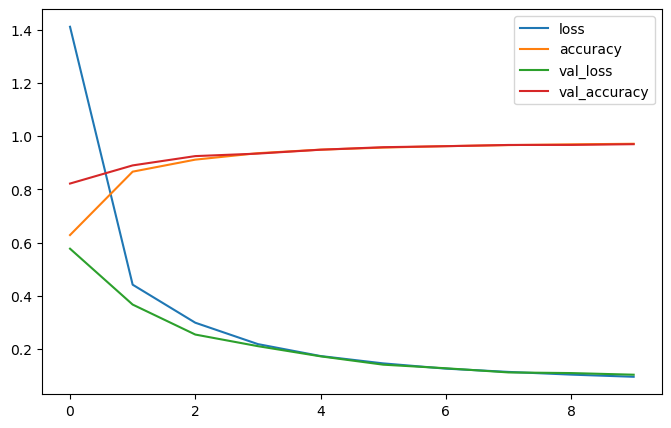

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# Reshape into 4D (as CNNs require each sample to be XSIZE x YSIZE x CHANNELS) and also do pre-processing (divide by 255)
NSAMP,XSIZE,YSIZE = X_train_full.shape
X_train_full = X_train_full.reshape([NSAMP,XSIZE,YSIZE,1])/255.0
X_test = X_test.reshape([-1,XSIZE,YSIZE,1])/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size =0.2, stratify = y_train_full)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.01), verbose = 0, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))

### Week 6

In [4]:
# Skip connections
input1 = keras.layers.Input(shape=[5], name="input1") 
input2 = keras.layers.Input(shape=[6], name="input2") 
hidden1 = keras.layers.Dense(30, activation="relu")(input2) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) 
concat = keras.layers.concatenate([input1, hidden2]) 
output1 = keras.layers.Dense(1, name="output1")(concat) 
output2 = keras.layers.Dense(1, name="output2")(hidden2)  

model = keras.Model(inputs=[input1, input2], outputs=[output1, output2]) 

In [5]:
# creates two outputs, requires two loss functions. theri weights need to be determined
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [6]:
history = model.fit([X_train1, X_train2], [y_train1, y_train2],epoch=20,                     
       validation_data=([X_valid1, X_valid2], [y_valid1, y_valid2]))  
total, test1, test2 = model.evaluate([X_test1, X_text2], [y_test1, y_test2])  
ypred1, ypred2 = model.predict([X_new1, X_new2])

NameError: name 'X_train1' is not defined

In [7]:
# ResNet class
# Implementation example of Geron: Hands On Machine Learning 2019, Chapter 14 
class ResidualUnit (keras.layers.Layer): 
    def __init__ (self, filters, strides=1, activation="relu", **kwargs):
         super(). __init__ (**kwargs)
         self.activation = keras.activations.get(activation)
         self.main_layers = [
             keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),             
             keras.layers.BatchNormalization(),
             self.activation,
             keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),             
             keras.layers.BatchNormalization()]
         self.skip_layers = []
         if strides > 1:
             self.skip_layers = [
                 keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),                 
                 keras.layers.BatchNormalization()]             

In [8]:
def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
        Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z) 

In [9]:
# Configuration values
initial_filters=32
residual_unit_filters=[32, 64, 128]
actfn = "relu"
optimizer = keras.optimizers.Nadam
learningrate = 0.001 

In [15]:
# Build model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(initial_filters, 7, strides=2, input_shape=[28, 28, 1], padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Activation(actfn)) 
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = initial_filters
for filters in residual_unit_filters:
    if filters == prev_filters:
        strides = 1
    else:
        strides = 2
        model.add(ResidualUnit(filters, strides=strides))
        prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(10, activation="softmax")) 
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate = learningrate), metrics=["accuracy"])   
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_14 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 residual_unit_4 (ResidualUn  (None, 7, 7, 32)         0         
 it)                                                             
                                                      